In [2]:
## Binary Classification Using VGG16

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### Loding Data

In [5]:
original_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification'

In [6]:
train_data_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training'

test_data_path = '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing'

In [7]:

import glob 
from glob import glob 

In [8]:
## Glob will help us to seen how mant folders are there in a  Folder

In [9]:
 ##--> /* helps to show how many folders are there in the training folder

In [11]:

glob('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/*') ## /* helps to show how many folders are there in the training folder

['/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/PNEUMONIA',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/COVID19']

In [12]:
glob('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/*')

['/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/PNEUMONIA',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/NORMAL',
 '/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19']

In [13]:
## Now Importing Reguired Packages

In [14]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
preprocess_train_data = ImageDataGenerator(rescale = 1./255,
                                           shear_range = 0.2,
                                           horizontal_flip = True,
                                           zoom_range = 0.2)


preprocess_test_data = ImageDataGenerator(rescale = 1./255)

In [16]:
labels = ['COVID19','NORMAL','PNEUMONIA']

In [17]:
# Making Every Image as same cordinates

In [18]:
img_height , img_width = [256,256] 

In [19]:

train_data = preprocess_train_data.flow_from_directory(train_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'categorical' , batch_size = 32)


Found 5215 images belonging to 3 classes.


In [20]:
test_data =  preprocess_test_data.flow_from_directory(test_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'categorical' , batch_size = 32)

Found 1288 images belonging to 3 classes.


In [21]:
## Developing Own Architecture

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax

In [23]:
import matplotlib.pyplot as plt 

(1482, 1982, 3)


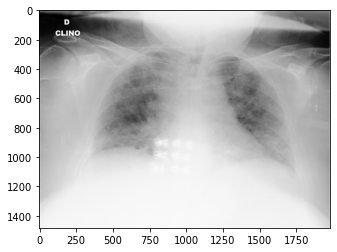

In [24]:
ima = plt.imread('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/COVID19/COVID19(1).jpg')
plt.imshow(ima)
print(ima.shape)

In [25]:

model = Sequential()
# first kernel and max pooling layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (img_height,img_width,3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# second kernel and max pooling layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# third kernel and max pooling layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# forth kernel and max pooling layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # one dimensional array
# above 1d data give to ANN 
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2
# output layer 
model.add(Dense(3,activation='softmax'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [27]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['Accuracy'])

In [28]:
model.fit(train_data , epochs = 5)              

Epoch 1/5
163/163 [==============================] - 1135s 6s/step - loss: 0.5962 - Accuracy: 0.7603
Epoch 2/5
163/163 [==============================] - 210s 1s/step - loss: 0.3468 - Accuracy: 0.8650
Epoch 3/5
163/163 [==============================] - 210s 1s/step - loss: 0.3330 - Accuracy: 0.8757
Epoch 4/5
163/163 [==============================] - 216s 1s/step - loss: 0.2782 - Accuracy: 0.8955
Epoch 5/5
163/163 [==============================] - 210s 1s/step - loss: 0.2567 - Accuracy: 0.9043


In [29]:
b = model.predict(test_data)

41/41 [==============================] - 330s 8s/step


In [30]:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [31]:
b

array([[3.17992439e-04, 9.09023285e-01, 9.06587467e-02],
       [5.98940142e-06, 8.23132634e-01, 1.76861376e-01],
       [1.13719279e-05, 9.71422136e-01, 2.85664834e-02],
       ...,
       [7.07196246e-04, 7.14194626e-02, 9.27873373e-01],
       [1.14197016e-01, 6.32224139e-03, 8.79480779e-01],
       [2.76779500e-03, 1.24916136e-01, 8.72316062e-01]], dtype=float32)

In [32]:
## Creating validation Report

In [41]:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [42]:
a = np.array([[1,3,4]])
np.argmax(a , axis = 1)

array([2])

In [43]:
predicted_points = np.argmax(b , axis = 1)

In [44]:
predicted_points

array([1, 1, 1, ..., 2, 2, 2])

In [37]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [45]:
accuracy_score(test_data.classes , predicted_points)

0.5186335403726708

In [46]:
confusion_matrix(test_data.classes , predicted_points)

array([[  6,  25,  85],
       [ 26,  87, 204],
       [ 76, 204, 575]])

In [47]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.06      0.05      0.05       116
           1       0.28      0.27      0.27       317
           2       0.67      0.67      0.67       855

    accuracy                           0.52      1288
   macro avg       0.33      0.33      0.33      1288
weighted avg       0.51      0.52      0.52      1288



In [48]:
## Testing an image:

In [49]:
import cv2

In [50]:
labels

['COVID19', 'NORMAL', 'PNEUMONIA']

In [51]:
# create a function to take the image from its path 

In [52]:
def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  sol = np.argmax(result , axis = 1)
  print(sol[0])
  print(labels[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

In [55]:
### Predicting Normal Images

(1325, 1499, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 376ms/step
[[5.7500902e-06 9.7954649e-01 2.0447826e-02]]
1
NORMAL


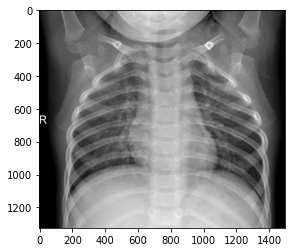

In [53]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL/NORMAL(1057).jpg')

(1318, 1534, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 82ms/step
[[1.0921103e-06 9.7517097e-01 2.4828024e-02]]
1
NORMAL


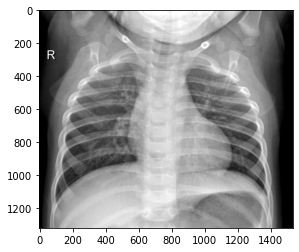

In [54]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL/NORMAL(1050).jpg')

(1747, 2009, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
[[2.1917791e-04 9.7360307e-01 2.6177833e-02]]
1
NORMAL


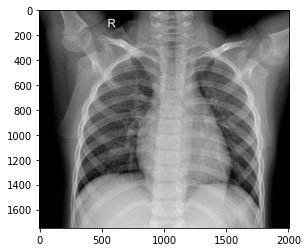

In [57]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Training/NORMAL/NORMAL(109).jpg')

In [71]:
### Now Predicting Images With Covid 19

(2539, 2916, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 47ms/step
[[0.97385603 0.00539187 0.02075199]]
0
COVID19


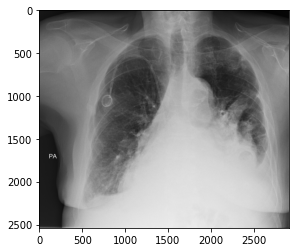

In [61]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19/COVID19(471).jpg')

(2002, 2491, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 32ms/step
[[0.63767934 0.03383635 0.3284843 ]]
0
COVID19


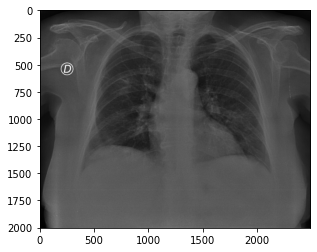

In [63]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19/COVID19(462).jpg')

(874, 1104, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 37ms/step
[[0.8091779  0.18781391 0.00300821]]
0
COVID19


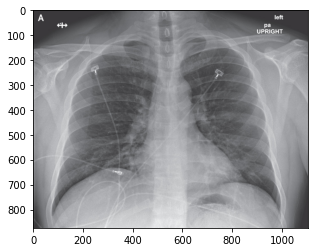

In [64]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19/COVID19(542).jpg')

(798, 906, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 65ms/step
[[0.92443633 0.07323316 0.00233056]]
0
COVID19


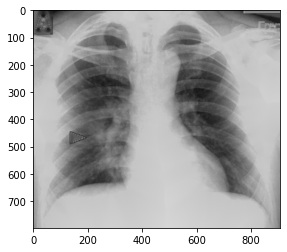

In [65]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/COVID19/COVID19(554).jpg')

In [70]:
### Now Predicting Images with Pneumonia

(992, 1504, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 51ms/step
[[0.01039755 0.03882374 0.95077866]]
2
PNEUMONIA


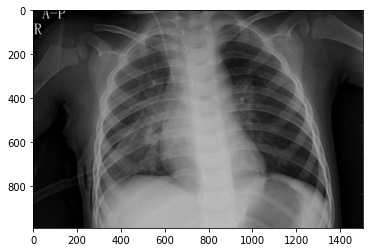

In [67]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/PNEUMONIA/PNEUMONIA(3440).jpg')

(728, 1024, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
[[0.00941442 0.01341583 0.9771698 ]]
2
PNEUMONIA


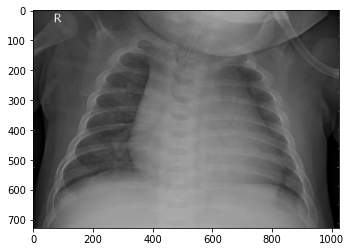

In [68]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/PNEUMONIA/PNEUMONIA(3444).jpg')

(832, 1192, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 25ms/step
[[0.00313813 0.00143359 0.9954283 ]]
2
PNEUMONIA


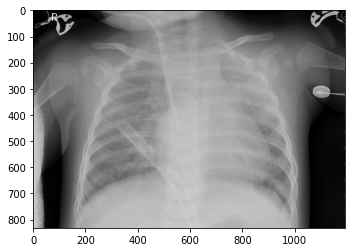

In [69]:
prediction('/content/drive/MyDrive/Data sets/Covid X - Ray MultiClassification/Testing/PNEUMONIA/PNEUMONIA(3432).jpg')